<a href="https://colab.research.google.com/github/Technorganic1/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data_Vince.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

General Notes:
- GITHUB is an open source version control system.
- There are other version control software systems (Bitbucket, GitLab, etc.)
- colab.research.google.com
- Fork creates a version of the master repository in your GitHub account.
- Open first module notebook and copy link into Colab
- Save a copy to GitHub and add commit message

## Loading Data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# How to download a dataset from url to local colab instance
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

--2019-07-10 02:48:08--  https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘drinks.csv’

drinks.csv          100%[===================>]   4.28K  --.-KB/s    in 0s      

2019-07-10 02:48:08 (108 MB/s) - ‘drinks.csv’ saved [4384/4384]



In [0]:
!ls

drinks.csv  sample_data


In [0]:
drinks2 = pd.read_csv('drinks.csv')
print(drinks2.shape)

(193, 5)


In [0]:
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
print(drinks.shape)
drinks.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


## Data Exploration

In [0]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [0]:
drinks.sort_values('wine_servings', ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
61,France,127,151,370,11.8
136,Portugal,194,67,339,11.0
3,Andorra,245,138,312,12.4
166,Switzerland,185,100,280,10.2
48,Denmark,224,81,278,10.4
156,Slovenia,270,51,276,10.6
99,Luxembourg,236,133,271,11.4
42,Croatia,230,87,254,10.2
83,Italy,85,42,237,6.5
55,Equatorial Guinea,92,0,233,5.8


In [0]:
drinks.nlargest(10, 'beer_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


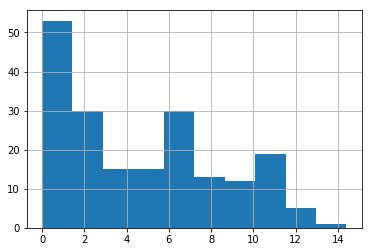

In [0]:
drinks.total_litres_of_pure_alcohol.hist()
plt.show()

In [0]:
drinks['drinks_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol'] > 9, 'high',
                           np.where(drinks['total_litres_of_pure_alcohol'] >= 6, 'medium',
                           np.where(drinks['total_litres_of_pure_alcohol'] == 0, 'none', 'low')))
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [0]:
drinks.drinks_alcohol.value_counts()

low       105
medium     41
high       34
none       13
Name: drinks_alcohol, dtype: int64

## Joining Another Dataset

In [0]:
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)
countries.head()

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
drinks.at[184, 'country'] = 'United States of America'

In [0]:
countries[['name','region','sub-region']].head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [0]:
# Wrong! Joined on index not country name. Pandas/python is smart but not human.
# Always sanity check the data and never assume that joins/merges worked as you expected
df = drinks.join(countries[['name','region','sub-region']], how='left')
print(df.shape)
df.head()

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Åland Islands,Europe,Northern Europe
2,Algeria,25,0,14,0.7,low,Albania,Europe,Southern Europe
3,Andorra,245,138,312,12.4,high,Algeria,Africa,Northern Africa
4,Angola,217,57,45,5.9,low,American Samoa,Oceania,Polynesia


In [0]:
# CORRECT join statement! Always validate results!
df = pd.merge(drinks, countries[['name','region','sub-region']], how='left', left_on='country', right_on='name')
print(df.shape)
df.head()

(193, 8)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,Angola,Africa,Sub-Saharan Africa


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 8 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
name                            168 non-null object
region                          168 non-null object
sub-region                      168 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 13.6+ KB


In [0]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
name                            25
region                          25
sub-region                      25
dtype: int64

In [0]:
# Which countries did not get joined properly
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,NaN,NaN,NaN
79,Iran,0,0,0,0.0,NaN,NaN,NaN
92,Laos,62,0,123,6.2,NaN,NaN,NaN


In [0]:
drinks.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
Name: 184, dtype: object

In [0]:
df.region.value_counts()

Africa      48
Asia        40
Europe      37
Americas    28
Oceania     15
Name: region, dtype: int64

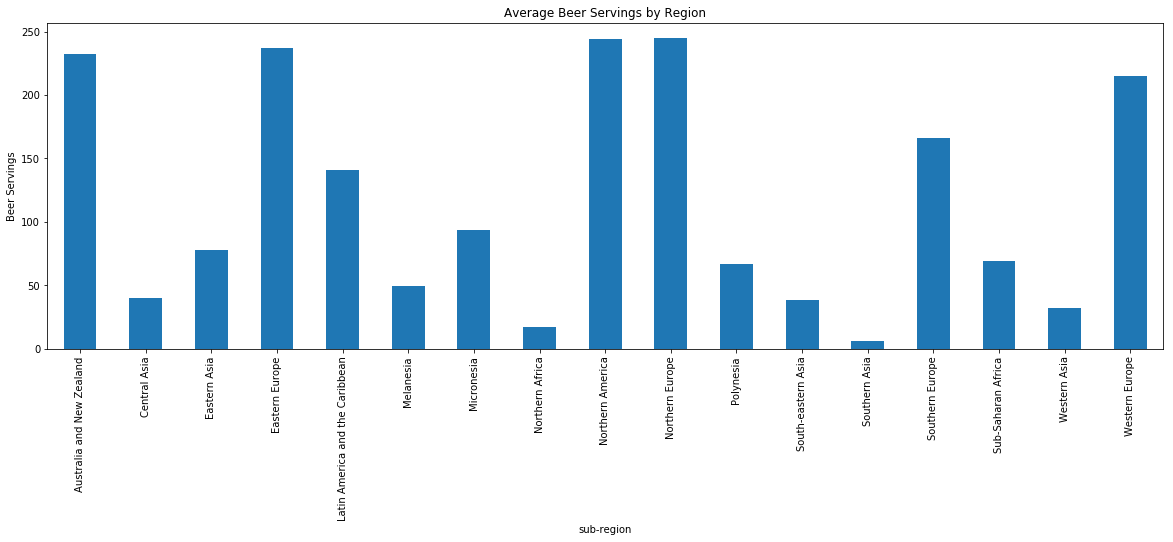

In [0]:
df.groupby('sub-region').beer_servings.mean().plot(kind='bar', figsize=(20,6))
plt.title('Average Beer Servings by Region')
plt.ylabel('Beer Servings')
plt.show()

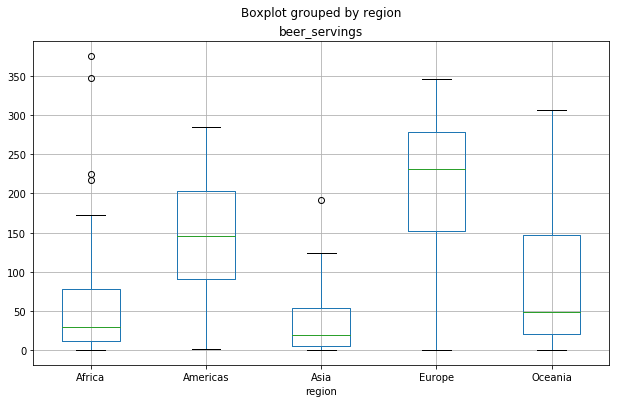

In [0]:
df.boxplot(column='beer_servings', by='region', figsize=(10,6))
plt.show()

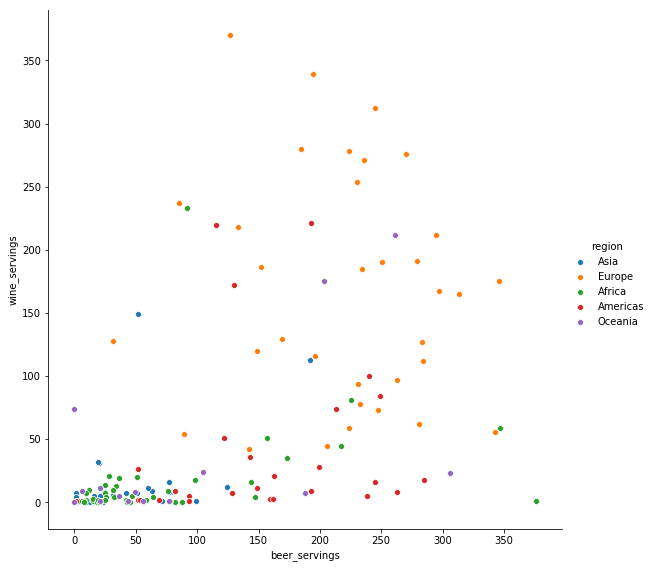

In [0]:
sns.pairplot(x_vars=["beer_servings"], y_vars=["wine_servings"], data=df, hue="region", height=8)
plt.show()

In [0]:
# Drop rows with NAs for Bokeh Interactive plot
df = df.dropna(subset=["region"])
df.shape

(168, 8)

## Awesome Bokeh Plot

In [0]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

x = df.beer_servings.values
y = df.wine_servings.values
country = df.country
region = df.region

source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])

palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)

# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Beer and Wine Servings per Year by Country")

# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)

# add axis labels
p.xaxis.axis_label = "Beer Servings"
p.yaxis.axis_label = "Wine Servings"

output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
!wget https://www.kaggle.com/kaushikburra/lol-worlds-2018-groups-stage-player-ratings

--2019-07-11 02:35:31--  https://www.kaggle.com/kaushikburra/lol-worlds-2018-groups-stage-player-ratings
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘lol-worlds-2018-groups-stage-player-ratings.1’

lol-worlds-2018-gro     [ <=>                ]  51.88K  --.-KB/s    in 0.001s  

2019-07-11 02:35:31 (64.7 MB/s) - ‘lol-worlds-2018-groups-stage-player-ratings.1’ saved [53125]



In [12]:
!ls

lol-worlds-2018-groups-stage-player-ratings  sample_data


In [0]:
# from google.colab import files
# uploaded = files.upload()

In [21]:
!ls

 lol-worlds-2018-groups-stage-player-ratings
'LOL Worlds 2018 Groups stage - Player Ratings (1).csv'
'LOL Worlds 2018 Groups stage - Player Ratings.csv'
 sample_data


In [22]:
lol = pd.read_csv('LOL Worlds 2018 Groups stage - Player Ratings.csv')
print(lol.shape)

(89, 12)


In [24]:
lol.head()

,Name,Team,Position,KDA Ratio,Kills Total,Deaths,Assists,Kill Participation,CS Per Minute,CS Total,Minutes Played,Games Played
0,Rekkles,FNC,ADC,13.7,28,6,54,0.73,10.8,2156,200,7
1,Mata,KT,Support,12.2,4,5,57,0.78,1.5,265,182,6
2,Broxah,FNC,Jungle,11.1,30,7,48,0.70,5.4,1072,200,7
3,Mowgli,AFS,Jungle,9.0,2,0,7,0.75,5.3,139,26,1
4,Uzi,RNG,ADC,8.8,33,8,37,0.66,10.8,2740,253,8


In [26]:
lol.columns

Index(['Name', 'Team', 'Position', 'KDA Ratio', 'Kills Total', 'Deaths',
       'Assists', 'Kill Participation', 'CS Per Minute', 'CS Total',
       'Minutes Played', 'Games Played'],
      dtype='object')

In [28]:
lol.sort_values('KDA Ratio', ascending=True).head(10)

,Name,Team,Position,KDA Ratio,Kills Total,Deaths,Assists,Kill Participation,CS Per Minute,CS Total,Minutes Played,Games Played
88,Empt2y,GRX,Jungle,0.5,3,13,4,0.37,4.3,362,83,3
87,Blaber,C9,Jungle,0.7,2,3,0,1.00,5.2,128,25,1
86,Liang,MAD,Top,0.7,10,23,7,0.53,7.8,1597,204,6
83,Breeze,MAD,ADC,0.8,7,18,8,0.47,10.0,2034,204,6
85,baybay,GRX,Jungle,0.8,3,11,6,0.47,4.9,444,90,3
84,Koala,GRX,Support,0.8,5,28,18,0.61,1.1,197,174,6
82,Benny,MAD,Jungle,1.0,3,6,3,0.60,4.7,273,58,2
81,K,MAD,Support,1.1,1,17,17,0.56,1.1,221,204,6
80,Uniboy,MAD,Mid,1.2,6,18,15,0.66,9.1,1846,204,6
79,PK,GRX,Top,1.2,8,19,15,0.61,7.5,1304,174,6


In [29]:
lol.sort_values('KDA Ratio', ascending=False).head(10)

,Name,Team,Position,KDA Ratio,Kills Total,Deaths,Assists,Kill Participation,CS Per Minute,CS Total,Minutes Played,Games Played
0,Rekkles,FNC,ADC,13.7,28,6,54,0.73,10.8,2156,200,7
1,Mata,KT,Support,12.2,4,5,57,0.78,1.5,265,182,6
2,Broxah,FNC,Jungle,11.1,30,7,48,0.70,5.4,1072,200,7
3,Mowgli,AFS,Jungle,9.0,2,0,7,0.75,5.3,139,26,1
4,Uzi,RNG,ADC,8.8,33,8,37,0.66,10.8,2740,253,8
5,Ucal,KT,Mid,8.6,25,7,35,0.77,9.7,1756,182,6
6,Deft,KT,ADC,7.7,28,7,26,0.69,10.3,1879,182,6
7,Kuro,AFS,Mid,7.4,18,5,19,0.74,9.6,2015,210,6
8,Score,KT,Jungle,7.3,11,8,47,0.74,5.0,901,182,6
9,Doublelift,TL,ADC,7.0,17,5,18,0.69,11.1,2132,192,6


In [49]:
lol.nlargest(10, 'CS Total')

,Name,Team,Position,KDA Ratio,Kills Total,Deaths,Assists,Kill Participation,CS Per Minute,CS Total,Minutes Played,Games Played
37,Hjärnan,G2,ADC,4.2,20,13,34,0.68,10.3,2750,266,7
4,Uzi,RNG,ADC,8.8,33,8,37,0.66,10.8,2740,253,8
52,Wunder,G2,Top,2.9,21,15,23,0.55,10.2,2722,266,7
57,Perkz,G2,Mid,2.7,25,20,29,0.68,9.8,2600,266,7
25,Jensen,C9,Mid,4.9,34,17,49,0.81,9.3,2547,275,8
36,Sneaky,C9,ADC,4.2,22,15,41,0.61,9.1,2505,275,8
14,Betty,FW,ADC,6.3,27,10,36,0.74,9.9,2490,251,7
13,Kramer,AFS,ADC,6.3,18,6,20,0.76,11.2,2347,210,6
38,Licorice,C9,Top,4.1,22,15,40,0.60,8.4,2301,275,8
19,Attila,VIT,ADC,5.4,24,10,30,0.76,10.3,2277,221,6


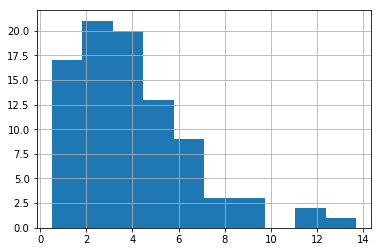

In [48]:
lol['KDA Ratio'].hist()
plt.show()

In [56]:
lol['CS Ratio'] = np.where(lol['CS Per Minute'] > 10, 'high',
                  np.where(lol['CS Per Minute'] >= 6, 'medium',
                  np.where(lol['CS Per Minute'] == 0, 'none', 'low')))
lol.head(20)

,Name,Team,Position,KDA Ratio,Kills Total,Deaths,Assists,Kill Participation,CS Per Minute,CS Total,Minutes Played,Games Played,CS Ratio
0,Rekkles,FNC,ADC,13.7,28,6,54,0.73,10.8,2156,200,7,high
1,Mata,KT,Support,12.2,4,5,57,0.78,1.5,265,182,6,low
2,Broxah,FNC,Jungle,11.1,30,7,48,0.70,5.4,1072,200,7,low
3,Mowgli,AFS,Jungle,9.0,2,0,7,0.75,5.3,139,26,1,low
4,Uzi,RNG,ADC,8.8,33,8,37,0.66,10.8,2740,253,8,high
5,Ucal,KT,Mid,8.6,25,7,35,0.77,9.7,1756,182,6,medium
6,Deft,KT,ADC,7.7,28,7,26,0.69,10.3,1879,182,6,high
7,Kuro,AFS,Mid,7.4,18,5,19,0.74,9.6,2015,210,6,medium
8,Score,KT,Jungle,7.3,11,8,47,0.74,5.0,901,182,6,low
9,Doublelift,TL,ADC,7.0,17,5,18,0.69,11.1,2132,192,6,high


In [57]:
lol['CS Ratio'].value_counts()

medium    40
low       39
high      10
Name: CS Ratio, dtype: int64

In [76]:
lol['Position'].value_counts()

Jungle     24
Top        19
ADC        16
Mid        15
Support    15
Name: Position, dtype: int64

In [58]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
Name                  89 non-null object
Team                  89 non-null object
Position              89 non-null object
KDA Ratio             89 non-null float64
Kills Total           89 non-null int64
Deaths                89 non-null int64
Assists               89 non-null int64
Kill Participation    89 non-null float64
CS Per Minute         89 non-null float64
CS Total              89 non-null int64
Minutes Played        89 non-null int64
Games Played          89 non-null int64
CS Ratio              89 non-null object
dtypes: float64(3), int64(6), object(4)
memory usage: 9.1+ KB


In [59]:
lol.isna().sum()
# lucky there are no null values, picked a datasheet a little too easy i feel :(

Name                  0
Team                  0
Position              0
KDA Ratio             0
Kills Total           0
Deaths                0
Assists               0
Kill Participation    0
CS Per Minute         0
CS Total              0
Minutes Played        0
Games Played          0
CS Ratio              0
dtype: int64

In [61]:
lol.iloc[9]

Name                  Doublelift
Team                          TL
Position                     ADC
KDA Ratio                      7
Kills Total                   17
Deaths                         5
Assists                       18
Kill Participation          0.69
CS Per Minute               11.1
CS Total                    2132
Minutes Played               192
Games Played                   6
CS Ratio                    high
Name: 9, dtype: object

In [64]:
lol['Deaths'].value_counts()

15    8
17    7
6     7
16    7
7     7
18    5
13    5
10    5
11    4
8     4
20    3
19    3
5     3
9     3
23    2
25    2
3     2
12    2
14    2
4     1
1     1
32    1
28    1
21    1
26    1
27    1
0     1
Name: Deaths, dtype: int64

In [103]:
lol['Team'].value_counts()

MAD    6
C9     6
RNG    6
PVB    6
GEN    6
IG     6
EDG    6
AFS    6
GRX    6
FNC    6
VIT    5
KT     5
G2     5
TL     5
FW     5
100    4
Name: Team, dtype: int64

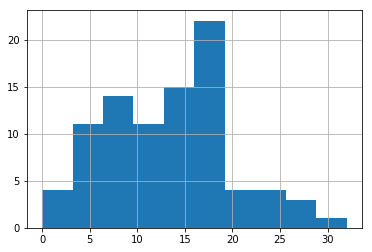

In [65]:
lol['Deaths'].hist()
plt.show()

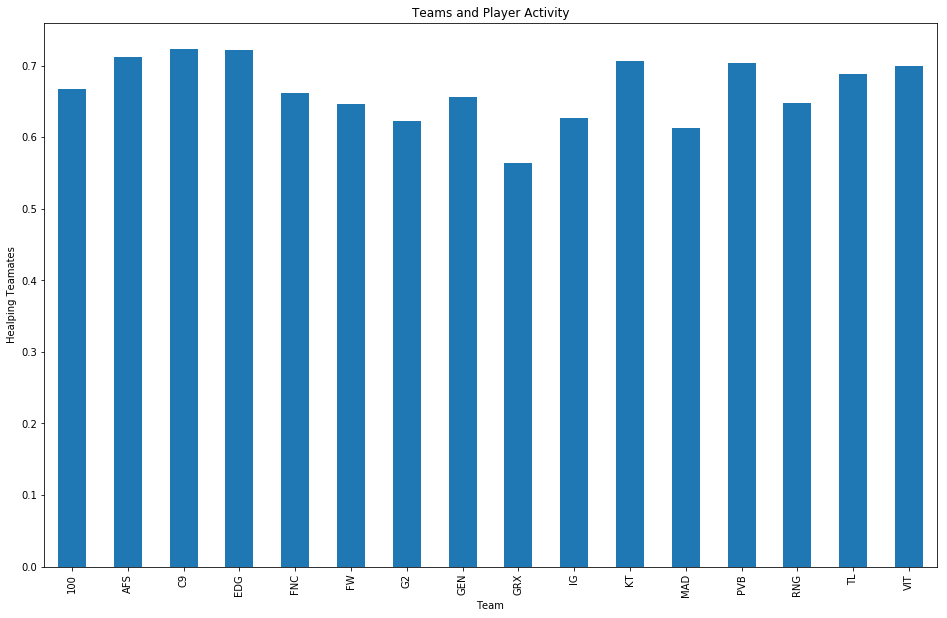

In [105]:
lol.groupby('Team')['Kill Participation'].mean().plot(kind='bar', figsize=(16,10))
plt.title('Teams and Player Activity')
plt.ylabel('Healping Teamates')
plt.show()

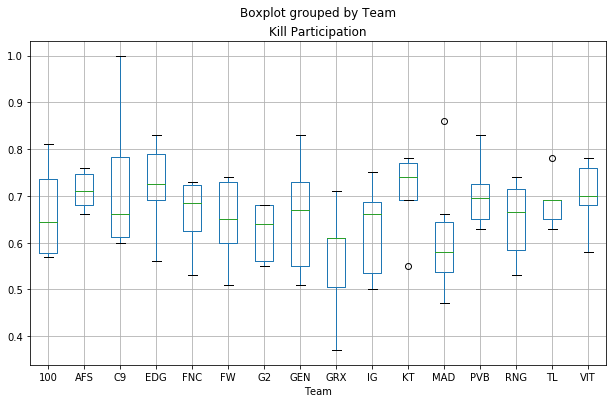

In [107]:
lol.boxplot(column='Kill Participation', by='Team', figsize=(10,6))
plt.show()

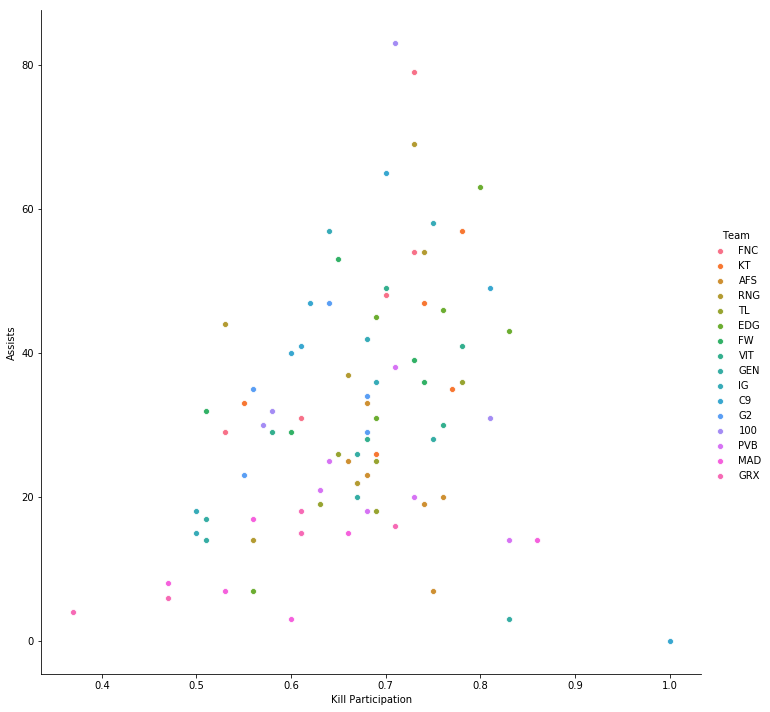

In [108]:
sns.pairplot(x_vars=['Kill Participation'], y_vars=['Assists'], data=lol, hue='Team', height=10)
plt.show()

In [0]:
# Dont need to drop any values I dont think for Bokeh

##Really Fun Plot

In [88]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

x = lol.Deaths.values
y = lol['Kills Total'].values
name = lol.Name
position = lol.Position

source = ColumnDataSource(data=dict(x=x, y=y, name=name, position=position))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('name', '@name'),
])

palette = d3['Category10'][len(lol['Position'].unique())]
mapper = CategoricalColorMapper(factors = lol['Position'].unique(), palette = palette)

# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Deaths, Kills and Player Role")

# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'position', 'transform': mapper},
          legend='position', 
          source=source)

# add axis labels
p.xaxis.axis_label = "Times Died"
p.yaxis.axis_label = "Total Kills"

output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

In [0]:
# Really happy I got the Bokeh to work, tried a few times to figure out which words i needed to use, the first time the graph loaded i had dots and colors but all names were '???'

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




In [0]:
# Hope the fact I didn't combine two datasets is ok, another I found was very similar but only smaller consisting of less teams from a later stage of that tournament
# felt like it would be a little redundant if I put both together

# Really not good at writing long paragraphs

##1. 
I wanted to show a comparison of some of the best teams of an esport game called League of Legends from 2018. Wolrds 2018 was a highly competitive tournament  consisting of 16 of the best teams from regions all over the world competiing for Fame, Glory and $6.45 Million dollars as a total prize pool.

##2.
Honestly at first I could not get the file from a website or into a csv to github(tried to upload it later and still couldnt put it in the LSDS111 folder) finally was able to get a html to load in but i still wanted the csv and was able to download it then upload from local and i realized i duplicated the datasheet. 
Then of course tinkering with Bokeh was fun and challenging!

##3.
There are quite a few things I find interesting, merging datasets is a big one, not just always having to use one at a time.

##4.
The areas I would like to study more is most of the general coding so I have a good memory of my own on how and when to use certain code functions ie: in the office hours I had a question about using dots instead of brackets so the notebook understood what I was trying to tell it

Another one is to get a good hang of the proper ways to quickly import data to a notebook.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.